In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [3]:
file_path = "data/climate_videos.jsonl"
climate_videos = pd.read_json(file_path, lines=True)

In [6]:
climate_videos.head(1)

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:31.549534,Climate change threatens to make dry regions e...,503.0,XPSYzLZ7xKU,200,15328.0,"seeker,science,curiosity,education,explain,lea...",Transforming Air Into Pure Drinking Water Is F...,2019-10-03 00:00:00,357909.0


<AxesSubplot:>

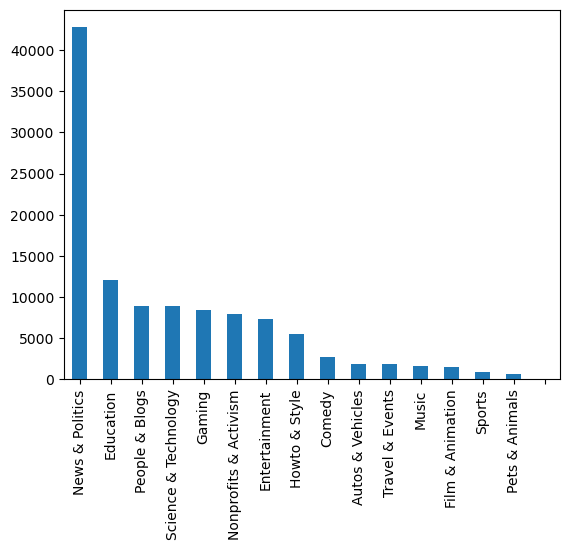

In [7]:
category_counts = climate_videos['categories'].value_counts()
category_counts.plot(kind='bar')


Suspicious categories : gaming ?